<h1>Medical Cost</h1>
<p style="font-size:16px">Insurance costs rise enormously during corona times. That's why I became aware of the topic. In the table I found on Kaggle are the other factors that have a big impact on insurance charges.<br<
<br>
<p style="font-size:16px">In this tutorial, I want to examine how smoking affects the cost of health insurance as a greatest factor that affects medical cost charges. Also I will see what other factors are and how they affect the Insurance costs.<br>   
<p style="font-size:16px">I will also predict the charges and compare them with the current costs. The calculation of Insurance charges will be carried out using the Polynomial Regression.</p>
<br>
<h3>Attribute Information:</h3>
<p style="font-size:16px">age: age of primary beneficiary<br>
<p style="font-size:16px">sex: female, male<br>
<p style="font-size:16px">bmi: Body mass index<br>
<p style="font-size:16px">children: Number of children covered by health insurance<br>
<p style="font-size:16px">smoker: yes, no
<p style="font-size:16px">region: residential area in the US (northeast, southeast, southwest, northwest)<br>
<p style="font-size:16px">charges: costs covered by heath insurance</p>
<br>
<p style="font-size:16px">Data avaible on Kaggle.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder # label encoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import Ridge
import mglearn

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

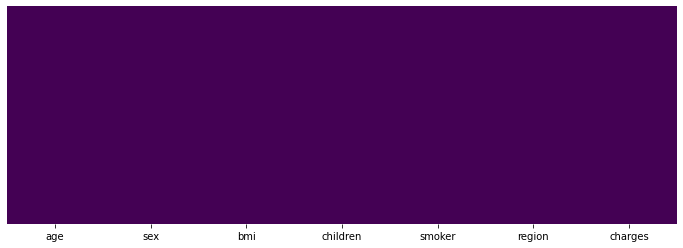

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

<p style="font-size:18px">No missing values, I can start with the work</p>

<h3>Explorativ analysis.</h3>

Text(0.5, 1.0, 'Distribution of Charges')

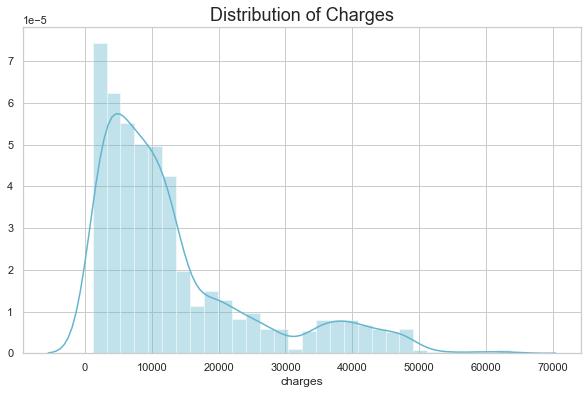

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges', fontsize=18)

<p style="font-size:18px">This distribution is right-skewed. To make it closer to normal we can apply natural log.</p>

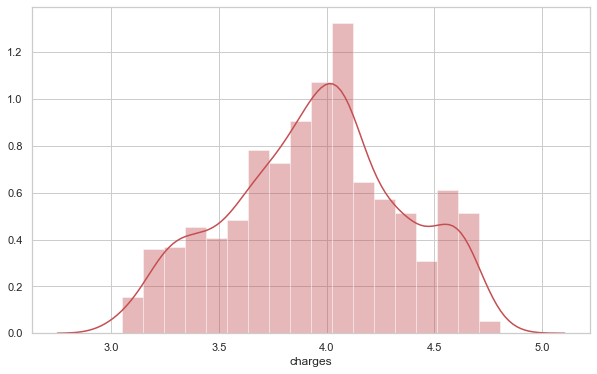

In [9]:
plt.figure(figsize=(10,6))
ax = sns.distplot(np.log10(data["charges"]), kde = True, color = "r" )

<p style="font-size:18px">Now let's take a look at the charges by region.</p>

In [10]:
byCharges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
byCharges=pd.DataFrame(byCharges)
byCharges=byCharges.reset_index()

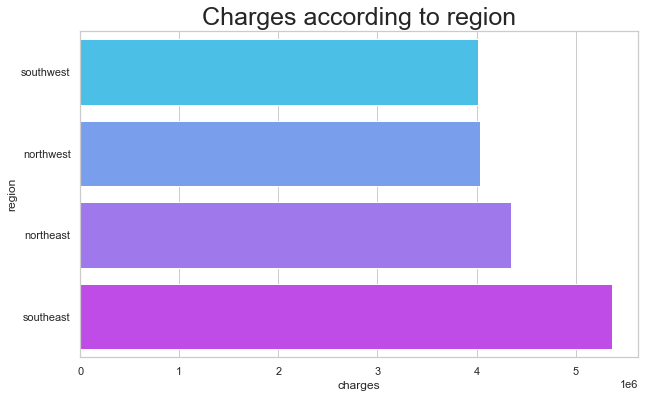

In [11]:
plt.figure(figsize=(10,6))
byCharges = sns.barplot(x="charges", y="region", data=byCharges, palette="cool").set_title("Charges according to region", fontsize=25)

<p style="font-size:18px">Region Southeast has the highest insurance cost.</p>

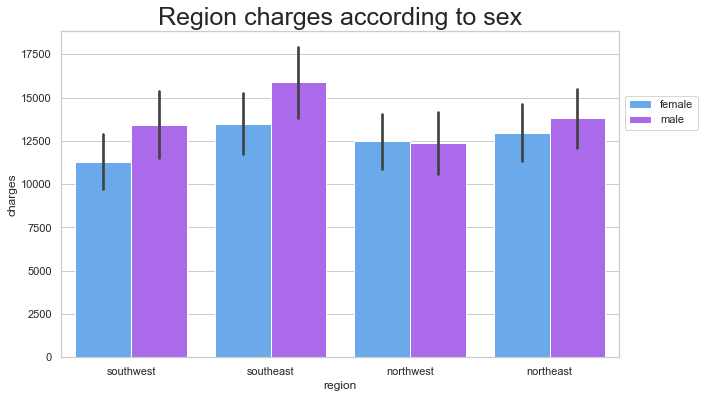

In [12]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool').set_title("Region charges according to sex", fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.show() 

<p style="font-size:18px">The majority of costs are caused by the male population.<br>
Only in the northwest region are the costs for both genders approximately the same.</p>

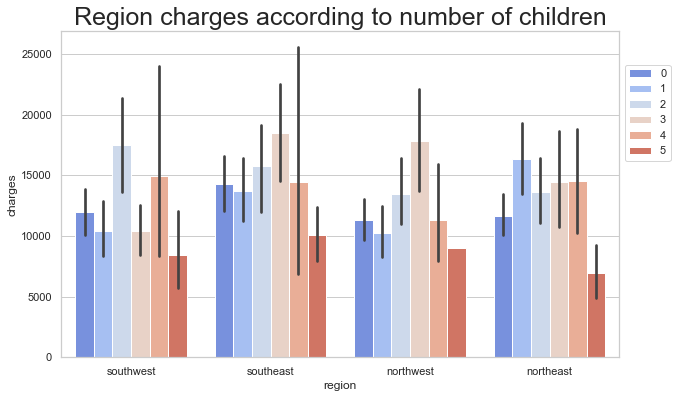

In [13]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='coolwarm').set_title("Region charges according to number of children", fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.show() 

<p style="font-size:18px">The families with children generally have higher medical costs.<br>
Families with 3 children have most of the costs in the Northwest and Southeast.<br> 
In the southwest region there are familys with 2 children.<br>
And in the northeast region - the are the familys with 1 child.</p>

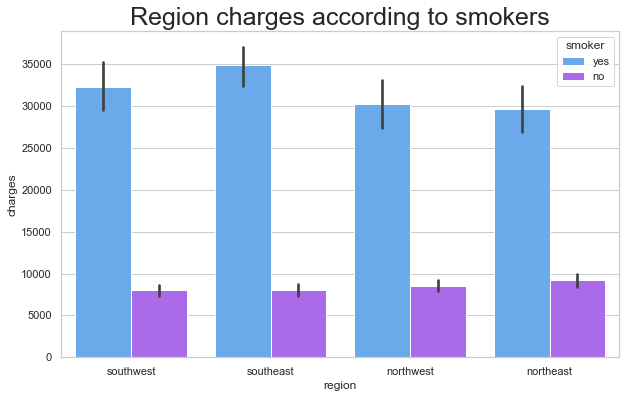

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=data, palette='cool').set_title("Region charges according to smokers", fontsize=25)

<p style="font-size:18px">The southeast region has the highest smoking costs. The northeast region has the lowest costs.<br>
The northeast region also has the highest number of non-smokers.</p>
<br>

<p style="font-size:18px">Let's see how the costs are distributed among the agegroups.<br>

In [15]:
bins = [0,16,32,48,64,200]
labels = ['0-16', '16-32', '32-48', '48-64', '64+']
data['agegroup']=pd.cut(data['age'], bins, labels = labels)

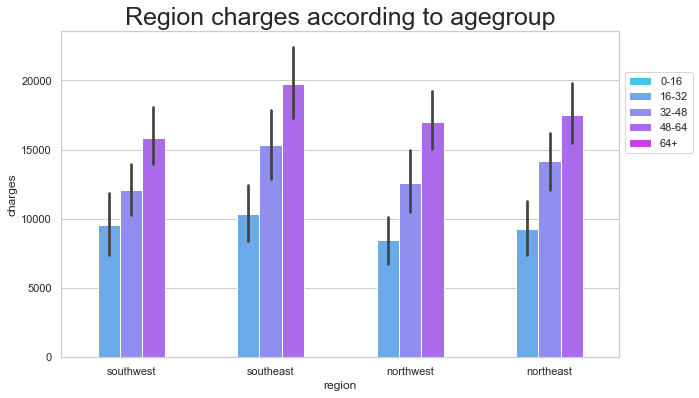

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='charges', hue='agegroup', data=data, palette='cool').set_title("Region charges according to agegroup", fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.show() 

<p style="font-size:18px">Most of the costs are caused by the age group 48-64. That affects every region.<br>
The second largest group in terms of costs is the age group 32-48.<br>
The age group 16-32 causes the least costs.</p>

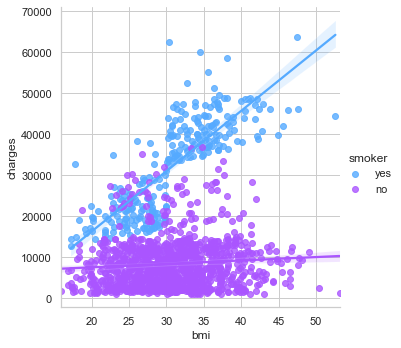

In [17]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='cool')

<p style="font-size:18px">The costs for smokers rise with the increasing BMI.</p>

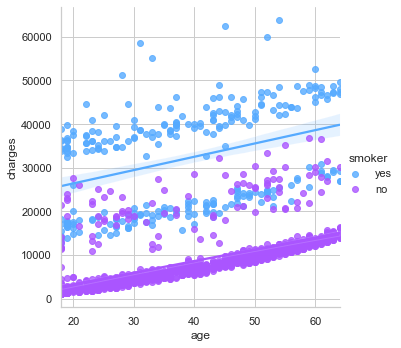

In [18]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='cool')

<p style="font-size:18px">The costs of smokers increasing with age.<br>

In [19]:
### Vorbereitung zu Linearer Regression

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
 7   agegroup  1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


In [21]:
##Converting objects labels into categorical
data[["sex", "smoker", "region"]] = data[["sex", "smoker", "region"]].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
agegroup    category
dtype: object

In [22]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age            int64
sex            int32
bmi          float64
children       int64
smoker         int32
region         int32
charges      float64
agegroup    category
dtype: object

In [23]:
data.drop(["agegroup"], axis=1, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


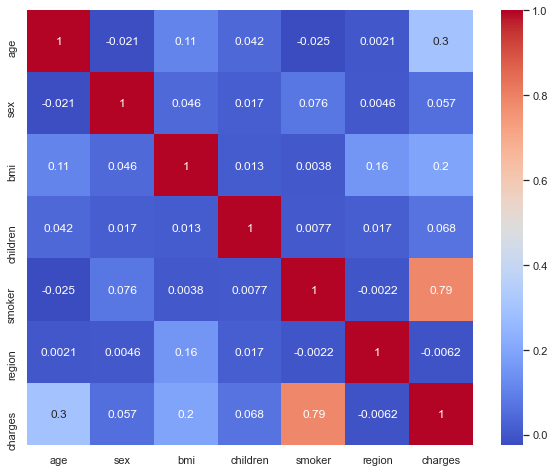

In [25]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<p style="font-size:18px">Correlation only with "smoker".</p>

<h3>Linear Regression</h3>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [27]:
X=data.drop("charges", axis=True)
y=data["charges"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [29]:
lr = LinearRegression()
lr = LinearRegression().fit(X_train, y_train)
#Lin_reg.fit(X_train, y_train)
#print(Lin_reg.intercept_)
#print(Lin_reg.coef_)
#print(Lin_reg.score(X_test, y_test))
# X, y = mglearn.datasets.make_wave(n_samples=60)

In [30]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]
lr.intercept_: -11827.73314179568


In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.79


<p style="font-size:18px">The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later.</p>

<h3>Ridge Regression</h3>

In [32]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.79


In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.78


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.79


In [36]:
Ridge = Ridge(alpha=0.4)         
Ridge.fit(X_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, y_test))

-11809.214603453425
[  256.47500955   -46.08866461   328.92870938   479.23308222
 23338.07542511  -276.76870368]
0.7909320170526886


<p style="font-size:18px">Here is the optimal alpha value and the best result.</p>

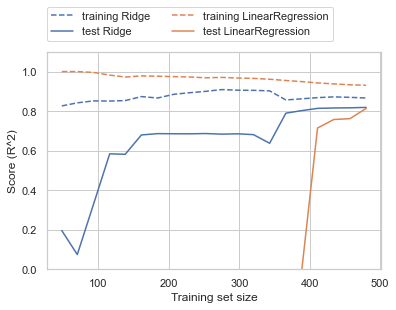

In [38]:
mglearn.plots.plot_ridge_n_samples()

<p style="font-size:18px">Because Ridge is regularized, the training score at Ridge is consistently lower.</p>

<h3>Random Forest Regressor</h3>

In [39]:
x = data.drop(["charges"], axis=1)
y = data["charges"]

In [40]:
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,y_train)
X_train_pred = Rfr.predict(X_train)
X_test_pred = Rfr.predict(X_test)

In [41]:
# Normally the print code will produce a FutureWarning, so I want to suppress it:

import warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # the following code will normally generate a FutureWarning message:
    print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(X_train_pred, y_train),
       metrics.mean_squared_error(X_test_pred, y_test)))
    print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,X_train_pred, y_train),
       metrics.r2_score(y_test,X_test_pred, y_test)))


MSE train data: 3524236.553, MSE test data: 22939116.567
R2 train data: 0.971, R2 test data: 0.858


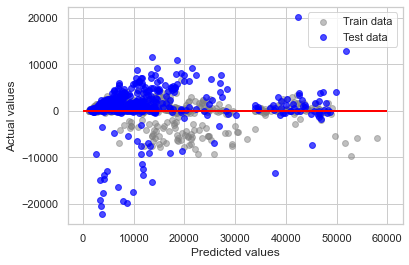

In [42]:
plt.scatter(X_train_pred, X_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(X_test_pred, X_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color= 'red')

<p style="font-size:18px">Here we can see that the train dataset is regulated and located along the line. Test dataset, on the other hand, has the values that are too far from the line.<br>
Let's take a look at Feature importances.</p>

Feature importance ranking


1.smoker(0.595302)
2.bmi(0.216125)
3.age(0.142426)
4.children(0.022062)
5.region(0.016909)
6.sex(0.007176)


<BarContainer object of 6 artists>

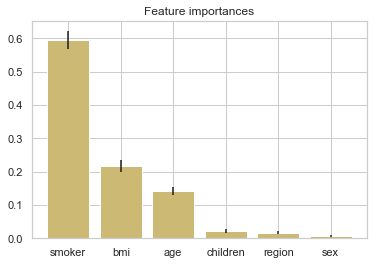

In [43]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

<p style="font-size:18px">The bar for "smokers" reached almost 60%! Followed by "BMI" and "Age". "Children", "Region" and "Sex" do not contribute significantly to the increase in costs.</p>

<h3>Polynomial Regression</h3>

In [44]:
X = data.drop(["charges", "sex", "region"], axis=1)
y = data["charges"]

In [45]:
pol = PolynomialFeatures (degree = 2)
X_pol = pol.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)
y_train_pred = Pol_reg.predict(X_train)
y_test_pred = Pol_reg.predict(X_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(X_test, y_test))

-5325.881705253369
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345236


In [46]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477638
Mean Squared Error: 18895160.098780263
Root Mean Squared Error: 4346.856346692431


In [47]:
##Predicting the charges
y_test_pred = Pol_reg.predict(X_test)
##Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
data

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


<h2>Conclusion:</h2>
<p style="font-size:18px">Smoking is the greatest factor that affects medical cost charges, then it's bmi and age. The costs will go up.</p>